In [1]:
%pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


In [4]:
download_url = ("https://raw.githubusercontent.com/fivethirtyeight/"
  "data/master/college-majors/recent-grads.csv" )

In [5]:
df = pd.read_csv(download_url)

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
pd.set_option("display.max.columns", None)

In [8]:
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [9]:
%matplotlib

Using matplotlib backend: <object object at 0x10ae71320>


In [10]:
%matplotlib inline

<Axes: xlabel='Rank'>

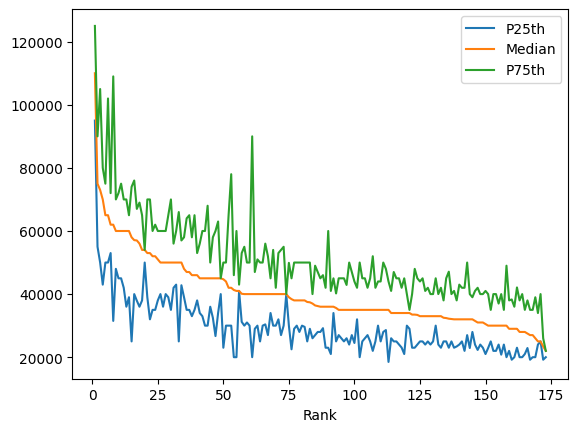

In [11]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"])

In [10]:
 import matplotlib.pyplot as plt

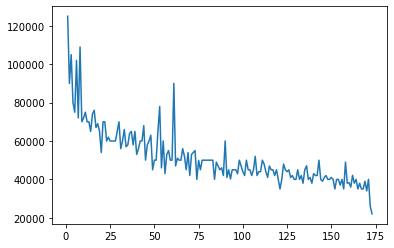

In [11]:
plt.plot(df["Rank"], df["P75th"])

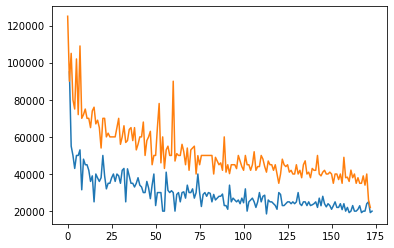

In [13]:
plt.plot(df["Rank"],df["P25th"], df["P75th"])

In [14]:
median_column = df["Median"]

<AxesSubplot:ylabel='Frequency'>

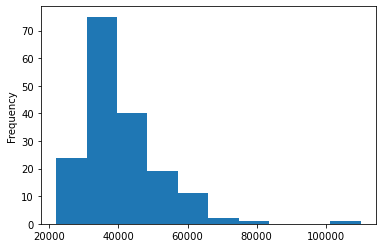

In [15]:
 median_column.plot(kind="hist")

In [16]:
unemployment_col = df["Unemployment_rate"]

In [17]:
type(unemployment_col)

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

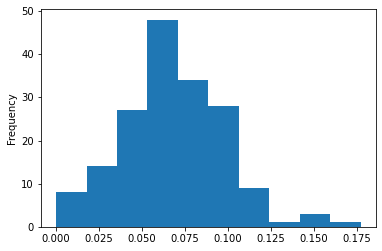

In [18]:
unemployment_col.plot(kind="hist")

In [19]:
top_5 = df.sort_values(by="Median", ascending=False).head()

<AxesSubplot:xlabel='Major'>

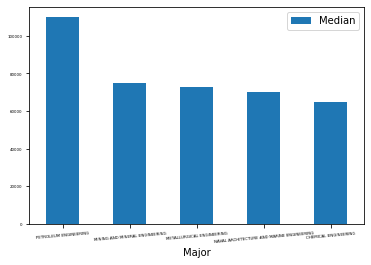

In [20]:
top_5.plot(x="Major", y="Median", kind="bar", rot=5, fontsize=4)

In [21]:
#create new data frame for high earners
top_medians = df[df["Median"] > 60000].sort_values("Median")

<AxesSubplot:xlabel='Major'>

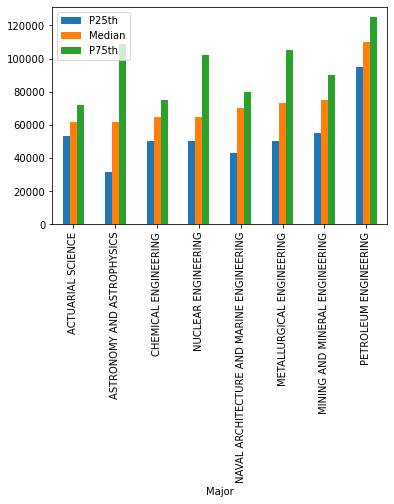

In [22]:
#can then plot a compound bar chart for these high salary majors
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

<AxesSubplot:xlabel='Median', ylabel='Unemployment_rate'>

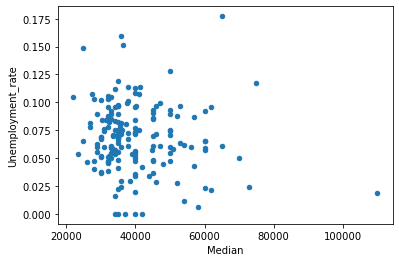

In [23]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

In [28]:
med_unem = df[["Median", "Unemployment_rate"]]

In [29]:
#can check correlation 0..1 - = negative correlation
med_unem.corr(method='pearson')

,Median,Unemployment_rate
Median,1.000000,-0.108833
Unemployment_rate,-0.108833,1.000000


In [32]:
for colname in df.columns:
    print(colname)

Rank
Major_code
Major
Total
Men
Women
Major_category
ShareWomen
Sample_size
Employed
Full_time
Part_time
Full_time_year_round
Unemployed
Unemployment_rate
Median
P25th
P75th
College_jobs
Non_college_jobs
Low_wage_jobs


In [33]:
list(df.columns)

['Rank',
 'Major_code',
 'Major',
 'Total',
 'Men',
 'Women',
 'Major_category',
 'ShareWomen',
 'Sample_size',
 'Employed',
 'Full_time',
 'Part_time',
 'Full_time_year_round',
 'Unemployed',
 'Unemployment_rate',
 'Median',
 'P25th',
 'P75th',
 'College_jobs',
 'Non_college_jobs',
 'Low_wage_jobs']

In [37]:
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values()

In [38]:
cat_totals

Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

<AxesSubplot:ylabel='Major_category'>

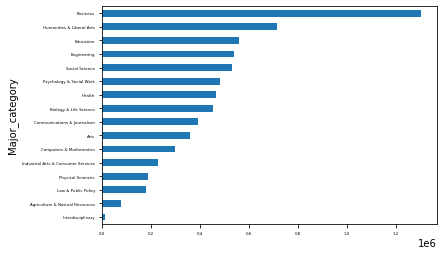

In [40]:
cat_totals.plot(kind='barh', fontsize=4)

<AxesSubplot:ylabel='Total'>

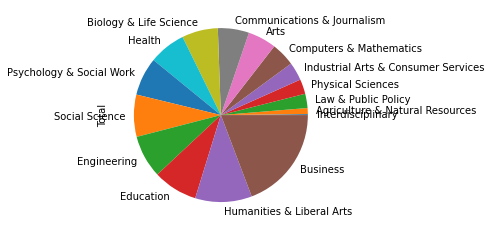

In [41]:
# Pie chart is hard to read because business degrees dominate with relatively few
# interdisciplinary degrees

cat_totals.plot(kind="pie")

In [42]:
#can put categories into "bins"
small_cat_totals = cat_totals[cat_totals < 100_000]
big_cat_totals = cat_totals[cat_totals > 100_000]

# put the small cat totals together in a category called "other"
small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])

<AxesSubplot:>

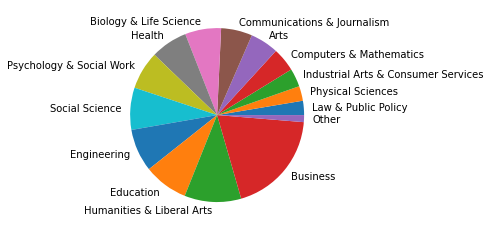

In [43]:
# add this back to the big_cat_totals series to get all the info
# back in one series but now all the small ones are grouped under "other"

big_cat_totals = big_cat_totals.append(small_sums)
big_cat_totals.plot(kind="pie", label="")

<AxesSubplot:>

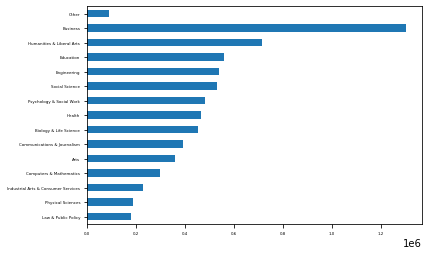

In [44]:
# better as no overlapping text 


# bar chart still clearer IMHO!
big_cat_totals.plot(kind="barh", label="", fontsize=4)

<AxesSubplot:ylabel='Frequency'>

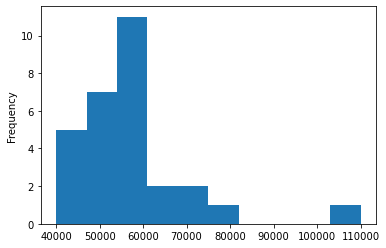

In [45]:
# within categories can check the distribution and density 
df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")